In [1]:
import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [2]:
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897


In [3]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
dataStdScaled = stdScaler.fit_transform(data)
dataStdScaled = pd.DataFrame(dataStdScaled, columns=data.columns, index=data.index)

In [4]:
dataStdScaled

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,-1.722298,-1.535255,1.728570,0.476007,0.441364,-0.370877,-2.169749,1.137675,0.862400,0.575627,0.693994
1963-01-01,-1.722298,-1.023289,-1.359900,-0.175764,0.441364,-0.848745,0.084397,-0.861027,0.438857,-0.325204,-1.121667
1963-01-01,-1.722298,1.106741,1.648350,0.579505,0.441364,-0.655634,-0.563213,-0.443486,-0.885160,1.350760,1.813920
1963-01-01,-1.722298,-0.277463,-0.076380,0.924059,0.441364,-0.960029,0.682044,2.349643,1.755756,0.056078,0.586356
1963-01-01,-1.722298,1.226832,1.377608,0.602431,0.441364,0.313195,-0.103929,2.358433,-1.123626,0.814451,0.110790
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.943388,-0.441797,0.760917,-0.967060,0.441364,-0.897841,-0.884136,-0.861027,-0.073666,0.420600,-0.024736
2022-12-26,1.943388,-0.068884,0.695738,0.101976,-1.457158,-0.976395,-1.879574,1.173936,0.563429,0.739033,-0.920090
2022-12-26,1.943388,0.101771,0.389899,-0.526214,0.441364,1.039817,0.280410,-0.778617,-0.027396,-0.098949,-0.733191
2022-12-26,1.943388,-0.245860,-0.617865,0.815321,0.441364,0.820521,1.738975,-0.773123,-0.148409,-0.136658,-1.102586


In [5]:
dataStdScaled.to_csv('data/dataframe_std.csv')

In [174]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        if idx != dayformat:
            X = dataframe.loc[dayformat].values
            y = label.loc[dayformat].values
            
            s = np.arange(X.shape[0])
            np.random.shuffle(s)
            X = X[s]
            y = y[s]
            
            Xs.append(X)
            ys.append(y)
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [218]:
X, y = create_sequences(1963, data, label)
X.shape, y.shape

((3131,), (3131,))

In [176]:
stdX, y = create_sequences(1963, dataStdScaled, label)
stdX.shape, y.shape

((3131,), (3131,))

In [219]:
temp = []
for x in X:
    for i in x:
        temp.append(i)
temp = np.array(temp)
temp.shape

(313087, 11)

In [220]:
X = temp

In [221]:
temp = []
for y_ in y:
    for i in y_:
        temp.append(i)
temp = np.array(temp)
temp.shape

(313087, 1)

In [222]:
y = temp
y.shape

(313087, 1)

## 기본 데이터 사용

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.explained_variance_ratio_

c:\Users\PC\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([9.93704334e-01, 3.34193632e-03, 8.87607313e-04, 5.00971988e-04,
       4.18796432e-04, 3.02583272e-04, 2.65098571e-04, 2.25674584e-04,
       1.84438650e-04, 1.52909548e-04, 1.56497992e-05])

In [225]:
x_length = len(X_train[0])
x = np.arange(x_length)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

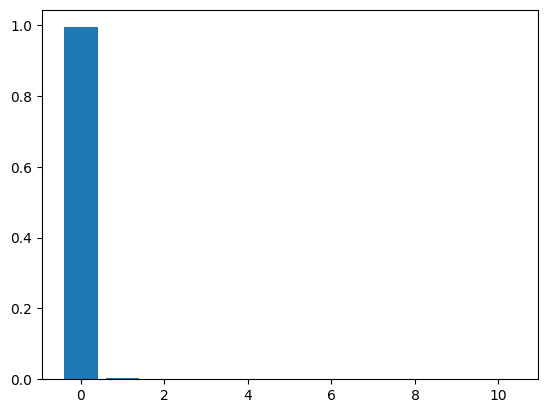

In [226]:
x = np.arange(len(lda.explained_variance_ratio_))
plt.bar(x, lda.explained_variance_ratio_)
plt.show()

In [227]:
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [228]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))
print("평균 정확도", np.mean(cross_val_score(model, X_train_lda, y_train, cv=5)))

학습 세트 정확도 :  0.957
검증 세트 정확도 :  -0.97
평균 정확도 -0.9476528229250134


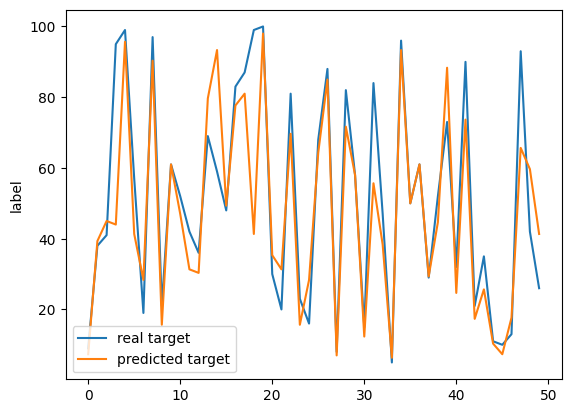

In [229]:
number_of_sample = 50

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('label')
plt.legend()
plt.show()

In [230]:
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [231]:
data2023.describe()

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000
mean,26.000000,212.850000,231.561887,368.079057,0.672642,203.758302,325.459811,82.985094,182.091698,259.267358,363.531321
std,15.298502,107.386301,114.054946,198.671913,0.505683,143.972382,159.933981,109.672967,93.052868,135.434647,220.230802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,128.750000,145.000000,204.000000,0.000000,75.000000,206.750000,0.000000,139.000000,151.000000,164.000000
50%,26.000000,210.000000,230.000000,370.000000,1.000000,179.000000,328.000000,0.000000,161.000000,265.000000,350.000000
75%,39.000000,301.000000,329.250000,542.000000,1.000000,327.000000,454.000000,174.000000,245.250000,378.000000,539.000000
max,52.000000,412.000000,432.000000,713.000000,2.000000,503.000000,600.000000,320.000000,380.000000,488.000000,743.000000


In [232]:
data2023['date'] = data2023['date'] + 835
data2023

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2023-01-01,835,12,206,574,1,106,333,0,31,173,414
2023-01-01,835,173,97,666,1,172,524,0,358,463,547
2023-01-01,835,300,74,652,1,91,527,0,21,430,113
2023-01-01,835,283,100,47,1,34,350,199,327,476,42
2023-01-01,835,240,50,49,1,43,514,0,41,466,322
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,887,187,381,100,1,247,223,0,317,404,416
2023-12-31,887,262,361,196,0,319,189,0,318,434,30
2023-12-31,887,92,331,273,1,38,311,22,158,240,393
2023-12-31,887,344,427,253,0,125,347,142,176,475,167


In [233]:
X2023, y2023 = create_sequences(2023, data2023, label2023)

In [234]:
X2023.shape, y2023.shape

((52, 100, 11), (52, 100, 1))

In [235]:
X2023 = X2023.reshape(X2023.shape[0]*X2023.shape[1], X2023.shape[2])
y2023 = y2023.reshape(y2023.shape[0]*y2023.shape[1], 1)

In [238]:
X2023_lda = lda.transform(X2023)

In [239]:
predict2023 = model.predict(X2023_lda)

In [241]:
pred_score = model.score(X2023_lda, y2023)

print('예측 세트 정확도 : ', round(pred_score, 3))
print("평균 정확도", np.mean(cross_val_score(model, X2023_lda, y2023, cv=5)))

예측 세트 정확도 :  -0.775
평균 정확도 0.37650671775731237


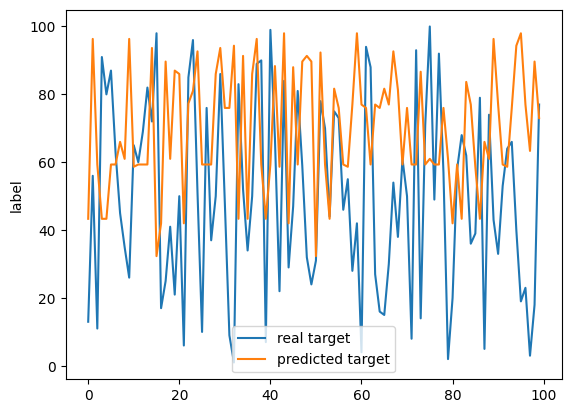

: 

In [244]:
plt.plot(range(100), y2023[:100], label='real target')
plt.plot(range(100), predict2023[:100], label='predicted target')
plt.ylabel('label')
plt.legend()
plt.show()